<a href="https://colab.research.google.com/github/naelmostafa/computer-vision/blob/main/Assignment-4/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

## Download fiftyone

In [1]:
!pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 4.6 MB/s 
     |████████████████████████████████| 79.9 MB 1.1 MB/s 
     |████████████████████████████████| 37.8 MB 1.3 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 226 kB 17.7 MB/s 
     |████████████████████████████████| 133 kB 62.4 MB/s 
     |████████████████████████████████| 192 kB 56.7 MB/s 
     |████████████████████████████████| 57 kB 4.9 MB/s 
     |████████████████████████████████| 132 kB 64.7 MB/s 
     |████████████████████████████████| 63 kB 3.4 MB/s 
     |████████████████████████████████| 108 kB 82.7 MB/s 
     |████████████████████████████████| 49 kB 7.5 MB/s 
     |████████████████████████████████| 564 kB 80.2 MB/s 
     |████████████████████████████████| 80 kB 13.2 MB/s 
     |████████████████████████████████| 202 kB 80.4 MB/s 
     |████████████████████████████████| 5

## Imports

In [44]:
import torch
import torchvision
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import functional as func
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.nn import Linear
import plotly.graph_objects as go

import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F

# Model intialization


*   Run on GPU if available
*   Load pre-trained Model
*   load model to GPU
*   Set to evalution mode

In [3]:
# Run on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

## Faster R-CNN

In [4]:
# Load pre-trained model
model_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT)
# model_rcnn.roi_heads.box_predictor.cls_score = Linear(in_features=1024, out_features=20, bias=True)
model_rcnn.to(device)
model_rcnn.eval()

print("Model Faster R-CNN")

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth


  0%|          | 0.00/167M [00:00<?, ?B/s]

Model Faster R-CNN


In [5]:
# print(model_rcnn)

In [6]:
# for name, child in model_rcnn.named_children():
#         for x, y in child.named_children():
#             print(name,x)
      
# print('Original:', model_rcnn.roi_heads.box_predictor.cls_score)
# model_rcnn.roi_heads.box_predictor.cls_score = Linear(in_features=1024, out_features=20, bias=True)
# print('Modified:', model_rcnn.roi_heads.box_predictor.cls_score)

## FCOS: Fully Convolutional One-Stage Object Detection

In [7]:
# Load pre-trained model
model_fcos = torchvision.models.detection.fcos_resnet50_fpn(weights=torchvision.models.detection.FCOS_ResNet50_FPN_Weights.DEFAULT)
model_fcos.to(device)
model_fcos.eval()

print("Model FOCS")

Downloading: "https://download.pytorch.org/models/fcos_resnet50_fpn_coco-99b0c9b7.pth" to /root/.cache/torch/hub/checkpoints/fcos_resnet50_fpn_coco-99b0c9b7.pth


  0%|          | 0.00/124M [00:00<?, ?B/s]

Model FOCS


## SSD

In [8]:
model_ssd = torchvision.models.detection.ssd300_vgg16(weights=torchvision.models.detection.SSD300_VGG16_Weights.DEFAULT)
model_ssd.to(device)
model_ssd.eval()

print("Model SSD")

Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth


  0%|          | 0.00/136M [00:00<?, ?B/s]

Model SSD


# Download VOC-2012 validation split and explore

## Download

In [9]:
# Download validation split
dataset = foz.load_zoo_dataset(
    "voc-2012",
    split="validation",
)

dataset.persistent = True

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/voc-2012/validation'


  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting /root/fiftyone/voc-2012/tmp-download/VOCtrainval_11-May-2012.tar to /root/fiftyone/voc-2012/tmp-download
 100% |███████████████| 5823/5823 [1.2m elapsed, 0s remaining, 84.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [1.2m elapsed, 0s remaining, 84.6 samples/s]      


Dataset info written to '/root/fiftyone/voc-2012/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/voc-2012/info.json'


Loading 'voc-2012' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'voc-2012' split 'validation'


 100% |███████████████| 5823/5823 [15.7s elapsed, 0s remaining, 323.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [15.7s elapsed, 0s remaining, 323.3 samples/s]      


Dataset 'voc-2012-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'voc-2012-validation' created


In [10]:
print(dataset)

Name:        voc-2012-validation
Media type:  image
Num samples: 5823
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [11]:
# Download coco-2017 validation split (used for classes)
dataset_coco = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
)

dataset_coco.persistent = True

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [2.8s elapsed, 0s remaining, 742.7Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [2.8s elapsed, 0s remaining, 742.7Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to '/root/fiftyone/coco-2017/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [8.7s elapsed, 0s remaining, 750.1Mb/s]       


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [8.7s elapsed, 0s remaining, 750.1Mb/s]       


Extracting images to '/root/fiftyone/coco-2017/validation/data'


INFO:fiftyone.utils.coco:Extracting images to '/root/fiftyone/coco-2017/validation/data'


Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [29.2s elapsed, 0s remaining, 157.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [29.2s elapsed, 0s remaining, 157.9 samples/s]      


Dataset 'coco-2017-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation' created


## Explore

In [12]:
print(dataset.first().ground_truth.detections[0])

<Detection: {
    'id': '63a5bd1dd19d88e435bf7220',
    'attributes': {},
    'tags': [],
    'label': 'tvmonitor',
    'bounding_box': [0.068, 0.029333333333333333, 0.828, 0.752],
    'mask': None,
    'confidence': None,
    'index': None,
    'occluded': 0,
    'truncated': 0,
    'pose': 'Frontal',
    'difficult': 0,
}>


In [13]:
session = fo.launch_app(dataset)

# Checking classes in both datasets

In [14]:
# Classes
classes_voc = dataset.default_classes
classes_coco = dataset_coco.default_classes
print('VOC Classes', len(classes_voc), '- COCO Classes', len(classes_coco))

VOC Classes 20 - COCO Classes 91


In [15]:
classes_voc

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [16]:
classes_coco

['0',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 '12',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 '26',
 'backpack',
 'umbrella',
 '29',
 '30',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 '45',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 '66',
 'dining table',
 '68',
 '69',
 'toilet',
 '71',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 '83',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier'

# Mapping VOC Classes to COCO Classes

In [17]:
classes_voc_mapped = ['airplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'dining table', 'dog', 'horse', 'motorcycle', 'person', 'potted plant', 'sheep', 'couch', 'train', 'tv']

In [18]:
class_dict = {}
for i, _class in enumerate(classes_voc_mapped):

  idx = classes_coco.index(_class)
  class_dict[idx] = classes_voc[i]

class_dict

{5: 'aeroplane',
 2: 'bicycle',
 16: 'bird',
 9: 'boat',
 44: 'bottle',
 6: 'bus',
 3: 'car',
 17: 'cat',
 62: 'chair',
 21: 'cow',
 67: 'diningtable',
 18: 'dog',
 19: 'horse',
 4: 'motorbike',
 1: 'person',
 64: 'pottedplant',
 20: 'sheep',
 63: 'sofa',
 7: 'train',
 72: 'tvmonitor'}

# Run test and add predictions to dataset to visualize

In [19]:
def prediction_inference(model, dataset, classes, label_name:str):
  # classes = dataset.default_classes
  # Add predictions to samples
  with fo.ProgressBar() as pb:
      for sample in pb(dataset):
          # Load image
          image = Image.open(sample.filepath)
          image = func.to_tensor(image).to(device)
          c, h, w = image.shape
          
          # Perform inference
          preds = model([image])[0]
          labels = preds["labels"].cpu().detach().numpy()
          scores = preds["scores"].cpu().detach().numpy()
          boxes = preds["boxes"].cpu().detach().numpy()

          # Convert detections to FiftyOne format
          detections = []
          for label, score, box in zip(labels, scores, boxes):

              if label in classes.keys():

              # Convert to [top-left-x, top-left-y, width, height]
              # in relative coordinates in [0, 1] x [0, 1]
                x1, y1, x2, y2 = box
                rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]
                
                detections.append(
                    fo.Detection(
                        label=classes[label],
                        bounding_box=rel_box,
                        confidence=score
                    )
                  )
              
          # Save predictions to dataset
          sample[label_name] = fo.Detections(detections=detections)
          sample.save()

  print("Finished adding predictions")

In [20]:
prediction_inference(model_rcnn, dataset, class_dict, "faster_rcnn")

 100% |███████████████| 5823/5823 [16.4m elapsed, 0s remaining, 6.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [16.4m elapsed, 0s remaining, 6.2 samples/s]      


Finished adding predictions


In [21]:
prediction_inference(model_fcos, dataset, class_dict, "fcos")

 100% |███████████████| 5823/5823 [13.3m elapsed, 0s remaining, 7.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [13.3m elapsed, 0s remaining, 7.8 samples/s]      


Finished adding predictions


In [22]:
prediction_inference(model_ssd, dataset, class_dict, "ssd")

 100% |███████████████| 5823/5823 [13.0m elapsed, 0s remaining, 7.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [13.0m elapsed, 0s remaining, 7.6 samples/s]      


Finished adding predictions


# Evaluate

In [23]:
# Only contains detections with confidence >= 0.75
high_conf_view = dataset.filter_labels("faster_rcnn", F("confidence") > 0.75, only_matches=False)
high_conf_view = high_conf_view.filter_labels("fcos", F("confidence") > 0.75, only_matches=False)
high_conf_view = high_conf_view.filter_labels("ssd", F("confidence") > 0.75, only_matches=False)

In [24]:
results_f_rcnn = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval_f_rcnn",
    compute_mAP=True,
    iou=0.5
)

results_fcos = high_conf_view.evaluate_detections(
    "fcos",
    gt_field="ground_truth",
    eval_key="eval_fcos",
    compute_mAP=True,
    iou=0.5
)

results_ssd = high_conf_view.evaluate_detections(
    "ssd",
    gt_field="ground_truth",
    eval_key="eval_ssd",
    compute_mAP=True,
    iou=0.5
)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5823/5823 [1.4m elapsed, 0s remaining, 62.1 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [1.4m elapsed, 0s remaining, 62.1 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5823/5823 [48.0s elapsed, 0s remaining, 96.5 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [48.0s elapsed, 0s remaining, 96.5 samples/s]       


Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5823/5823 [46.1s elapsed, 0s remaining, 103.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [46.1s elapsed, 0s remaining, 103.2 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5823/5823 [34.3s elapsed, 0s remaining, 140.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [34.3s elapsed, 0s remaining, 140.2 samples/s]      


Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████| 5823/5823 [56.1s elapsed, 0s remaining, 55.5 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [56.1s elapsed, 0s remaining, 55.5 samples/s]       


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████| 5823/5823 [38.7s elapsed, 0s remaining, 122.5 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [38.7s elapsed, 0s remaining, 122.5 samples/s]      


# Faster RCNN  results

*   Precision Recall f1-score support
*   mAP
*   pr curve

In [25]:
print(f'mAP: {results_f_rcnn.mAP()}')
results_f_rcnn.print_report()

mAP: 0.5802511916505052
              precision    recall  f1-score   support

   aeroplane       0.88      0.85      0.86       484
     bicycle       0.80      0.85      0.82       380
        bird       0.87      0.82      0.84       629
        boat       0.64      0.75      0.69       491
      bottle       0.71      0.73      0.72       733
         bus       0.83      0.90      0.87       320
         car       0.72      0.79      0.75      1173
         cat       0.90      0.91      0.90       618
       chair       0.61      0.71      0.66      1449
         cow       0.84      0.86      0.85       347
 diningtable       0.53      0.74      0.62       374
         dog       0.88      0.85      0.86       773
       horse       0.87      0.90      0.89       373
   motorbike       0.84      0.91      0.88       376
      person       0.77      0.90      0.83      5110
 pottedplant       0.59      0.70      0.64       542
       sheep       0.84      0.78      0.81       485
   

In [26]:
plot = results_f_rcnn.plot_pr_curves()
plot.show()

In [27]:
# plot.freeze()

# FCOS results

*   Precision Recall f1-score support
*   mAP
*   pr curve



In [28]:
print(f'mAP: {results_fcos.mAP()}')
results_fcos.print_report()

mAP: 0.23650524435939385
              precision    recall  f1-score   support

   aeroplane       1.00      0.50      0.66       484
     bicycle       0.95      0.22      0.35       380
        bird       0.97      0.42      0.59       629
        boat       0.92      0.11      0.20       491
      bottle       0.93      0.16      0.27       733
         bus       0.98      0.57      0.72       320
         car       0.96      0.26      0.41      1173
         cat       0.98      0.38      0.55       618
       chair       0.96      0.11      0.20      1449
         cow       0.97      0.41      0.57       347
 diningtable       0.67      0.01      0.01       374
         dog       0.97      0.37      0.53       773
       horse       0.97      0.43      0.60       373
   motorbike       0.99      0.27      0.43       376
      person       0.97      0.40      0.57      5110
 pottedplant       0.94      0.09      0.16       542
       sheep       1.00      0.41      0.58       485
  

In [29]:
plot = results_fcos.plot_pr_curves()
plot.show()

# SSD results

*   Precision Recall f1-score support
*   mAP
*   pr curve

In [30]:
print(f'mAP: {results_ssd.mAP()}')
results_ssd.print_report()

mAP: 0.3177265227342415
              precision    recall  f1-score   support

   aeroplane       0.98      0.62      0.76       484
     bicycle       0.99      0.50      0.66       380
        bird       0.95      0.42      0.58       629
        boat       0.96      0.21      0.34       491
      bottle       0.99      0.12      0.22       733
         bus       0.96      0.67      0.79       320
         car       0.99      0.30      0.46      1173
         cat       0.95      0.69      0.80       618
       chair       0.94      0.22      0.36      1449
         cow       0.94      0.48      0.63       347
 diningtable       0.93      0.23      0.37       374
         dog       0.93      0.62      0.74       773
       horse       0.96      0.65      0.78       373
   motorbike       0.95      0.60      0.74       376
      person       0.97      0.48      0.64      5110
 pottedplant       0.83      0.13      0.22       542
       sheep       0.95      0.41      0.57       485
   

In [31]:
plot = results_ssd.plot_pr_curves()
plot.show()

# Plotting IOU Distribution

In [37]:
def iou_dist(data):
  iou_f_rcnn = []
  iou_fcos = []
  iou_ssd = []

  with fo.ProgressBar() as pb:
      for sample in pb(data):
        for detection in sample.faster_rcnn.detections:
          if detection.eval_f_rcnn == 'tp':
            iou_f_rcnn.append(detection.eval_f_rcnn_iou)
        for detection in sample.fcos.detections:
          if detection.eval_fcos == 'tp':
            iou_fcos.append(detection.eval_fcos_iou)
        for detection in sample.ssd.detections:
          if detection.eval_ssd == 'tp':
            iou_ssd.append(detection.eval_ssd_iou)

  return iou_f_rcnn, iou_fcos, iou_ssd

In [38]:
iou_f_rcnn, iou_fcos, iou_ssd = iou_dist(high_conf_view)
print('Average IOU')
print('Faster R-CNN: ', np.average(iou_f_rcnn))
print('FCOS: ', np.average(iou_fcos))
print('SSD: ', np.average(iou_ssd))

 100% |███████████████| 5823/5823 [23.9s elapsed, 0s remaining, 217.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5823/5823 [23.9s elapsed, 0s remaining, 217.4 samples/s]      


Average IOU
Faster R-CNN:  0.8647354956050226
FCOS:  0.8940410197037469
SSD:  0.855607493159523


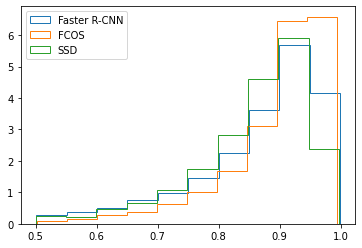

In [39]:
fig,ax = plt.subplots()
ax.hist(iou_f_rcnn, label="Faster R-CNN", histtype="step", density=True)
ax.hist(iou_fcos, label="FCOS", histtype="step", density=True)
ax.hist(iou_ssd, label="SSD", histtype="step", density=True)
plt.legend(loc='upper left')
plt.show()

# Plotting Confusion Matrices

## Faster R-CNN

In [45]:
fig = go.Figure()
fig = results_f_rcnn.plot_confusion_matrix(classes=classes_voc)
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

/usr/local/lib/python3.8/dist-packages/fiftyone/core/plots/plotly.py:1782: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://voxel51.com/docs/fiftyone/user_guide/plots.html#working-in-notebooks for more information.



## FCOS

In [48]:
fig = go.Figure()
fig = results_fcos.plot_confusion_matrix(classes=classes_voc)
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

## SSD

In [49]:
fig = go.Figure()
fig = results_ssd.plot_confusion_matrix(classes=classes_voc)
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

# Explore high Confidence view

In [43]:
session0 = fo.launch_app(high_conf_view)

## Faster RCNN

In [ ]:
# Show samples with most true positives
session1 = fo.launch_app(high_conf_view.sort_by("eval_f_rcnn_tp", reverse=True))

In [ ]:
# Show samples with most true positives
session2 = fo.launch_app(high_conf_view.sort_by("eval_f_rcnn_fp", reverse=True))

## FCOS

In [ ]:
# Show samples with most true positives
session3 = fo.launch_app(high_conf_view.sort_by("eval_fcos_tp", reverse=True))

In [ ]:
# Show samples with most true positives
session4 = fo.launch_app(high_conf_view.sort_by("eval_fcos_fp", reverse=True))

## SSD

In [ ]:
# Show samples with most true positives
session5 = fo.launch_app(high_conf_view.sort_by("eval_ssd_tp", reverse=True))

In [ ]:
# Show samples with most false positives
session6 = fo.launch_app(high_conf_view.sort_by("eval_ssd_fp", reverse=True))